# 1-4. 회전 행렬 실습

In [1]:
# 라이브러리 임포트 위해 경로 추가
import sys
import os
sys.path.append(os.path.join(os.getcwd(), ".."))

# math 라이브러리 임포트
from utils.math import *
from utils.plot import scatter_3d
import matplotlib.pyplot as plt

## 1. 여러 표현 방식과 회전 행렬 변환

### 1.1. 특정 축으로 회전
* Rot_axis(axis, radian)
    - axis: 축 번호, x: 1, y: 2, z: 3
    - radian: 라디안 단위 각도 값

In [2]:
# X 축 180도 회전 행렬
np.round(
    Rot_axis(1, np.deg2rad(180))
    , 3)

array([[ 1.,  0.,  0.],
       [ 0., -1., -0.],
       [ 0.,  0., -1.]])

In [3]:
# Y 축 90도 회전 행렬
np.round(
    Rot_axis(2, np.deg2rad(90))
    , 3)

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

### 1.2. 오일러 ZYX, 롤-피치-요, 쿼터니안 -> 회전 행렬
* Rot_zyx(z, y, x)
    - z, y, x: 라디안 값
    
* Rot_rpy(roll, pitch, yaw)
    - roll, pitch, yaw: 라디안 값
    
* Rot_quat(x, y, z, w)
    - x, y, z, w: 쿼터니안 표현식

In [4]:
# 오일러 ZYX
np.round(
    Rot_zyx(np.deg2rad(180), np.deg2rad(90), np.deg2rad(0))
    , 3)

array([[-0., -0., -1.],
       [ 0., -1.,  0.],
       [-1.,  0.,  0.]])

In [5]:
# 롤피치요 (거꾸로 하면 오일러ZYX와 동일)
np.round(
    Rot_rpy(np.deg2rad(0), np.deg2rad(90), np.deg2rad(180))
    , 3)

array([[-0., -0., -1.],
       [ 0., -1.,  0.],
       [-1.,  0.,  0.]])

In [6]:
# 쿼터니안
np.round(
    Rot_quat(0,0,0.707,0.707)
    , 3)

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

### 1.3. 회전 행렬 -> 오일러 ZYX, 롤-피치-요, 쿼터니안
* Rot2zyx(R) -> [z,y,x]
    - z, y, x: 라디안 값
    
* Rot_rpy(R) -> [roll, pitch, yaw]
    - roll, pitch, yaw: 라디안 값
    
* Rot_quat(R) -> [x, y, z, w]
    - x, y, z, w: 쿼터니안 표현식

In [7]:
# 오일러 ZYX
Rot2zyx([[ 0,  0, -1],
         [ 0, -1,  0],
         [-1,  0,  0]])

array([0.        , 1.57079633, 3.14159265])

In [8]:
# 롤피치요 (거꾸로 하면 오일러ZYX와 동일)
Rot2rpy([[ 0,  0, -1],
         [ 0, -1,  0],
         [-1,  0,  0]])

array([3.14159265, 1.57079633, 0.        ])

In [9]:
# 쿼터니안
Rot2quat([[ 0, -1,  0],
          [ 1,  0,  0],
          [ 0,  0,  1]])

array([0.        , 0.        , 0.70710678, 0.70710678])

## 2. 좌표, 좌표계 회전
### *[주의사항]*
* 행렬 곱셈은 * 아닌 np.matmul() 함수 사용!
* 회전 행렬 뒤에는 세로 벡터, 혹은 세로 벡터가 가로로 나열된 매트릭스가 곱해져야 하고, 차원 일치해야 함

### 좌표계 회전

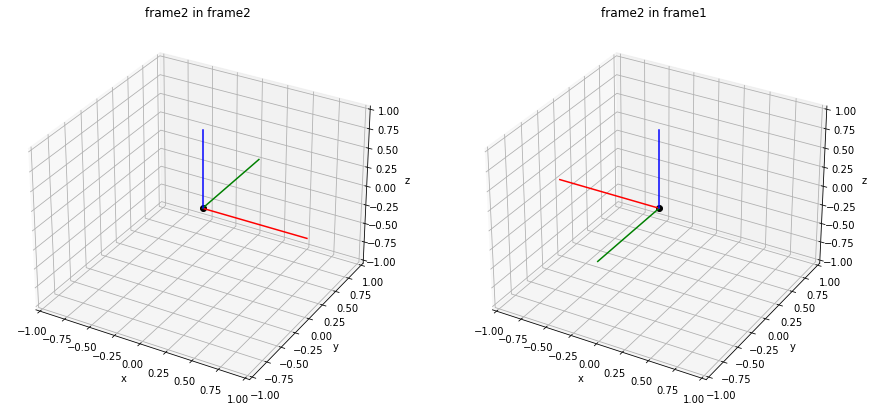

In [10]:
# 지역 좌표계2
X = [1, 0 ,0]
Y = [0, 1, 0]
Z = [0, 0, 1]
XYZ_2 = np.stack([X,Y,Z], axis=-1)
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 좌표계 그리기
# - 2번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 그대로 그려짐
_X, _Y, _Z = XYZ_2[:,0], XYZ_2[:,1], XYZ_2[:,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame2 in frame2")

# 오일러 ZYX 회전
R_12 = Rot_zyx(np.deg2rad(180), 0, 0)  # z 축으로 180도 회전하는 행렬

# 회전 행렬 적용
XYZ_1 = np.matmul(R_12, XYZ_2)  # 좌표계2는 좌표계1기준에서는 R_12 만큼 회전되었음

# 좌표계 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
_X, _Y, _Z = XYZ_1[:,0], XYZ_1[:,1], XYZ_1[:,2]
sub = fig.add_subplot(1, 2, 2, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame2 in frame1")

### 여러 좌표값에 회전 적용

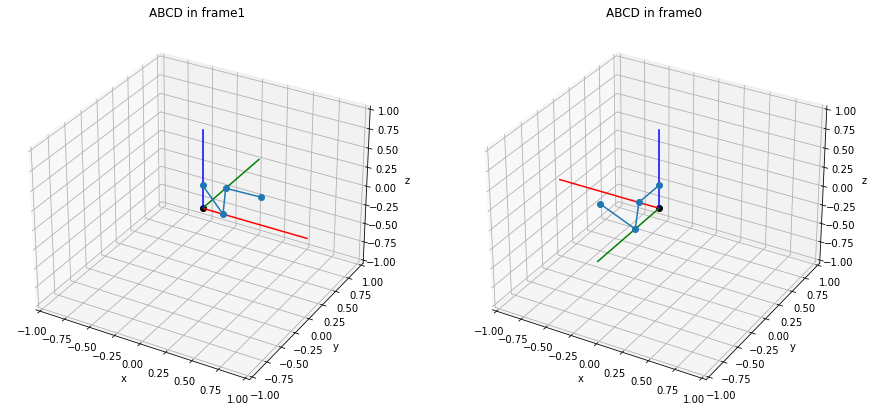

In [11]:
# 2번 좌표계에서의 A,B,C,D 점 좌표
A_2 = [0, 0 ,0.3]
B_2 = [0.2, 0, 0]
C_2 = [0, 0.4, 0]
D_2 = [0.4, 0.3, 0.1]
ABCD_2 = np.stack([A_2,B_2,C_2,D_2], axis=-1)
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 2번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_2[:,0], XYZ_2[:,1], XYZ_2[:,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_2.transpose(), '-o', sub=sub, fig=fig)  # 2번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("ABCD in frame1")

# 2번 좌표계의 ABCD를 1번 좌표계로 회전
ABCD_1 = np.matmul(R_12, ABCD_2)

# 1번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_1[:,0], XYZ_1[:,1], XYZ_1[:,2]
sub = fig.add_subplot(1, 2, 2, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1.transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("ABCD in frame0")

### 임의의 회전 적용해보기

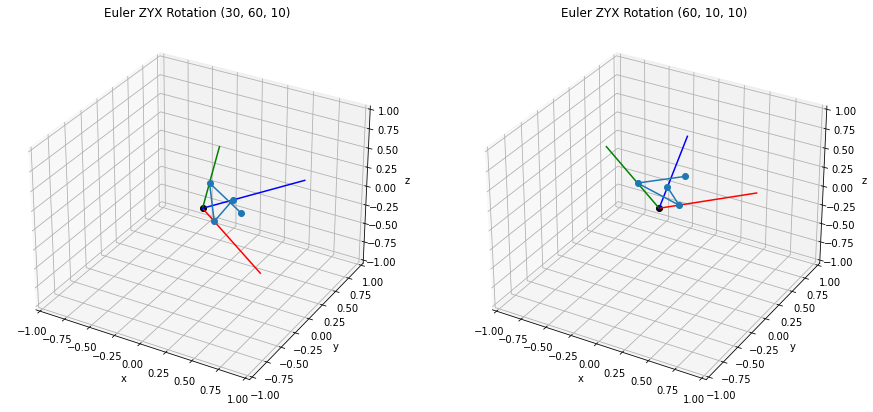

In [12]:
fig = plt.figure(figsize=(15, 15))

# 임의의 오일러 ZYX 회전
R_12 = Rot_zyx(np.deg2rad(30), np.deg2rad(60), np.deg2rad(10))

# 회전 행렬 적용
XYZ_1 = np.matmul(R_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(R_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_1[:,0], XYZ_1[:,1], XYZ_1[:,2]
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1.transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("Euler ZYX Rotation (30, 60, 10)")


# 임의의 오일러 ZYX 회전
R_12 = Rot_zyx(np.deg2rad(60), np.deg2rad(10), np.deg2rad(10))

# 회전 행렬 적용
XYZ_1 = np.matmul(R_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(R_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
_X, _Y, _Z = XYZ_1[:,0], XYZ_1[:,1], XYZ_1[:,2]
sub = fig.add_subplot(1, 2, 2, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1.transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("Euler ZYX Rotation (60, 10, 10)")

## 3. 회전 행렬의 곱셈 (회전 더하기)
* 회전은 기준 축을 고려해야 하기 때문에 숫자의 덧셈으로만 취급하기보다는, 물리적 의미를 생각해야 함
* 두번의 회전을 더한다면, 좌표계를 2->1, 1->0 으로 두번 옮기는 것으로 생각
    * 매 회전에서 회전 축은 옮겨지는 목표 좌표계를 기준으로 함
* 회전의 더함은 회전 행렬의 곱셈으로 표현 가능
```python
R_02 = R_01 * R_12
```

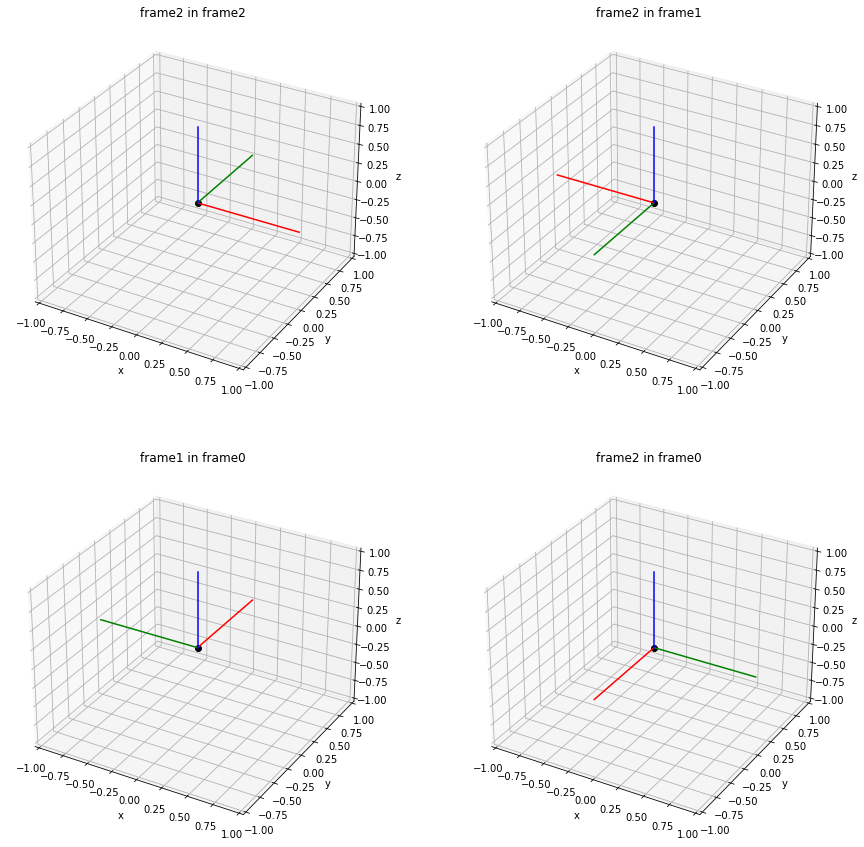

In [13]:
# 좌표계2는 좌표계1로부터 z 축으로 180도 회전
R_12 = Rot_zyx(np.deg2rad(180), 0, 0)  # z 축으로 180도 회전하는 행렬

# 좌표계1은 좌표계0으로부터 z 축으로 90도 회전
R_01 = Rot_zyx(np.deg2rad(90), 0, 0)  # z 축으로 90도 회전하는 행렬

# 지역 좌표계2
X = [1, 0 ,0]
Y = [0, 1, 0]
Z = [0, 0, 1]
XYZ = np.stack([X,Y,Z], axis=-1)
XYZ_22 = XYZ  # 좌표계2에서 본 좌표계2의 XYZ는 변형 없이 그대로임
# axis=-1 입력 이유: [X, Y, Z] 형태로 가로 방향으로 배치하기 위해
# 입력 않거나 axis=0 입력시 세로 방향으로 배치됨

# 좌표계2에서 좌표계2 그리기
# - 2번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 그대로 그려짐
_X, _Y, _Z = XYZ_22[:,0], XYZ_22[:,1], XYZ_22[:,2]
fig = plt.figure(figsize=(15, 15))
sub = fig.add_subplot(2, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame2 in frame2")

# 회전 행렬 적용
XYZ_12 = np.matmul(R_12, XYZ)  # 좌표계2를 좌표계1에서 표현하기 위해 R_12 만큼 회전 적용

# 좌표계1에서 좌표계2 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
_X, _Y, _Z = XYZ_12[:,0], XYZ_12[:,1], XYZ_12[:,2]
sub = fig.add_subplot(2, 2, 2, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame2 in frame1")

# 회전 행렬 적용
XYZ_01 = np.matmul(R_01, XYZ)  # 좌표계1을 좌표계0에서 표현하기 위해 R_01 만큼 회전 적용

# 좌표계0에서 좌표계1 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
_X, _Y, _Z = XYZ_01[:,0], XYZ_01[:,1], XYZ_01[:,2]
sub = fig.add_subplot(2, 2, 3, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame1 in frame0")

# 회전 행렬 적용
R_02 = np.matmul(R_01, R_12)  # 0에서 2로 가는 회전은 R_01과 R_12의 곱
XYZ_0 = np.matmul(R_02, XYZ_22)  # 좌표계2는 좌표계1기준에서는 R_12 만큼 회전되었음

# 좌표계0에서 좌표계2 그리기
# - 1번 좌표계에서 2번 좌표계를 그리므로 X,Y,Z 축이 회전된 상태로 그려짐
_X, _Y, _Z = XYZ_0[:,0], XYZ_0[:,1], XYZ_0[:,2]
sub = fig.add_subplot(2, 2, 4, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)  # X축 그리기
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)  # Y축 그리기
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)  # Z축 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("frame2 in frame0")

### 임의의 복수 회전 적용해보기

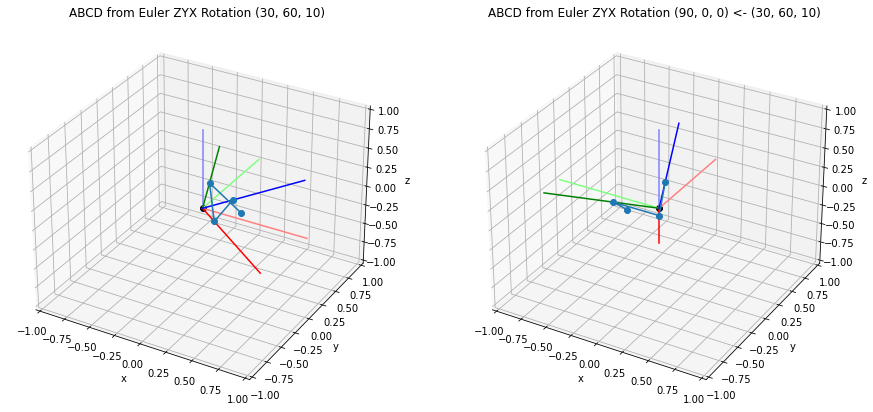

In [14]:
fig = plt.figure(figsize=(15, 15))

# 임의의 오일러 ZYX 회전 좌표계1 <- 좌표계2
R_12 = Rot_zyx(np.deg2rad(30), np.deg2rad(60), np.deg2rad(10))

# 임의의 오일러 ZYX 회전 좌표계0 <- 좌표계1
R_01 = Rot_zyx(np.deg2rad(90), np.deg2rad(0), np.deg2rad(0))

# 행렬곱을 이용한 0 <- 2 회전 획득
R_02 = np.matmul(R_01, R_12)

# 회전 행렬 적용
XYZ_12 = np.matmul(R_12, XYZ_2)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미

# 1번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_1 = np.matmul(R_12, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 1, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)

# 기본 좌표계 
scatter_3d(np.stack([[0,0,0], [1,0,0]]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,1,0]]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], [0,0,1]]), '#8080FF', sub=sub, fig=fig)

# 1번 좌표계에서 2번 좌표계 
_X, _Y, _Z = XYZ_12[:,0], XYZ_12[:,1], XYZ_12[:,2]
scatter_3d(np.stack([[0,0,0], _X]), 'r-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), 'g-', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), 'b-', sub=sub, fig=fig)
scatter_3d(ABCD_1.transpose(), '-o', sub=sub, fig=fig)  # 0번 좌표계에서의 ABCD 그리기
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("ABCD from Euler ZYX Rotation (30, 60, 10)")


# 임의의 오일러 ZYX 회전

# 회전 행렬 적용
XYZ_01 = np.matmul(R_01, XYZ)  # 좌표계 1은 좌표계0 기준에서는 R_01 만큼 회전되었음 의미
XYZ_02 = np.matmul(R_02, XYZ)  # 좌표계 2는 좌표계0 기준에서는 R_02 만큼 회전되었음 의미

# 2번 좌표계의 ABCD를 0번 좌표계로 회전
ABCD_0 = np.matmul(R_02, ABCD_2)

# 0번 좌표계에서 ABCD 포인트 그리기
sub = fig.add_subplot(1, 2, 2, projection="3d")
scatter_3d([[0,0,0]], 'ko', sub=sub, fig=fig)

# 0번 좌표계에서 1번 좌표계 
_X, _Y, _Z = XYZ_01[:,0], XYZ_01[:,1], XYZ_01[:,2]
scatter_3d(np.stack([[0,0,0], _X]), '#FF8080', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), '#80FF80', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), '#8080FF', sub=sub, fig=fig)

# 0번 좌표계에서 2번 좌표계 
_X, _Y, _Z = XYZ_02[:,0], XYZ_02[:,1], XYZ_02[:,2]
scatter_3d(np.stack([[0,0,0], _X]), '-r', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Y]), '-g', sub=sub, fig=fig)
scatter_3d(np.stack([[0,0,0], _Z]), '-b', sub=sub, fig=fig)

# 0번 좌표계에서의 ABCD 그리기
scatter_3d(ABCD_0.transpose(), '-o', sub=sub, fig=fig)  
sub.set_xlim(-1, 1)
sub.set_ylim(-1, 1)
sub.set_zlim(-1, 1)
_ = sub.set_title("ABCD from Euler ZYX Rotation (90, 0, 0) <- (30, 60, 10)")

## 4. 회전 행렬 되돌리기
* 역행렬 혹은 전치행렬로 회전을 되돌릴 수 있음
  - np.linalg.inv(R) 혹은 np.transpose(R) 함수 사용

In [15]:
print("역행렬")
print(np.round(np.linalg.inv(R_02), 3))
print("전치행렬")
print(np.round(np.transpose(R_02), 3))

역행렬
[[-0.25   0.433 -0.866]
 [-0.928 -0.362  0.087]
 [-0.276  0.825  0.492]]
전치행렬
[[-0.25   0.433 -0.866]
 [-0.928 -0.362  0.087]
 [-0.276  0.825  0.492]]


#### 회전 행렬 반대로 적용해보기
* 좌표계0 기준으로 계산해둔 ABCD 값으로부터 좌표계2 값을 다시 획득할 수 있음

In [16]:
R_20 = np.transpose(R_02)
ABCD_2_re = np.matmul(R_20, ABCD_0)
print("원래 좌표계2에서의 ABCD 값")
print(np.round(ABCD_2, 3))
print("좌표계1 값으로부터 역추정한 좌표계2에서의 ABCD 값")
print(np.round(ABCD_2_re, 3))

원래 좌표계2에서의 ABCD 값
[[0.  0.2 0.  0.4]
 [0.  0.  0.4 0.3]
 [0.3 0.  0.  0.1]]
좌표계1 값으로부터 역추정한 좌표계2에서의 ABCD 값
[[-0.   0.2 -0.   0.4]
 [-0.  -0.   0.4  0.3]
 [ 0.3 -0.   0.   0.1]]


## 5. 주기 함수
* 일반 modulus 함수를 쓰면 0에서 불연속점 발생
* 대안: mod_peri_zero 함수 - 360도의 경우 -180, +180에서 주기가 넘어가는 함수

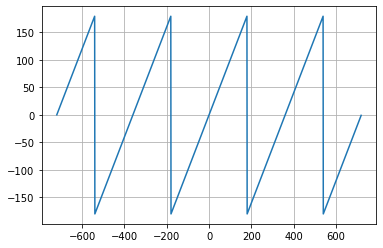

In [17]:
plt.plot(np.arange(-720,720), mod_peri_zero(np.arange(-720,720), 360))
plt.grid()